# Austin Police Department Crime Analysis

Below we are going to analyze some data from Austin Police Department

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Crime_Reports.csv',low_memory = False)

## I refined my data by pulling out unnessary columns 

In [41]:
#This is data refining by pulling out unnessary columns
df = df.drop(['Occurred Time','Occurred Date Time','Report Date Time','Report Date','Report Date Time','Report Time','Census Tract','UCR Category','X-coordinate','Y-coordinate','Latitude','Longitude','Location'], axis = 1)
df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Clearance Status,Clearance Date,Category Description
0,20113421783,CUSTODY ARREST TRAFFIC WARR,3722,N,12/08/2011,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,2000K WOODWARD ST,78741.0,3.0,HE,2,482,C,12/14/2011,NaN
1,2017471291,THEFT,600,N,02/16/2017,PARKING /DROP LOT/ GARAGE,1167 AIRPORT BLVD,78721.0,1.0,CH,4,424,N,03/29/2017,Theft
2,2003620481173,VIOL CITY ORDINANCE - OTHER,3299,N,02/17/2003,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,900 BLOCK W 9TH ST,78701.0,9.0,GE,1,373,C,NaN,NaN
3,20101382082,THEFT OF LICENSE PLATE,614,N,05/18/2010,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,100 RADAM LN,78745.0,3.0,DA,3,491,N,05/21/2010,Theft
4,20045054494,BURGLARY OF COIN-OP MACHINE,602,N,11/09/2004,COMMERCIAL / OFFICE BUILDING,1601 OHLEN RD,78758.0,4.0,ED,2,249,NaN,11/11/2004,Theft


## I filtered the data by my two variables of interest
I was interested in looking into the highest offense committed by each Zip Code in Austin

In [42]:
#Here I am filtering the data by my two variables of interest

offense_zipcode = df[['Highest Offense Description','Zip Code']]

## I made a two way table to visualize the count of each offense per zip code

In [43]:
#Make a 2 way table to analyze the Offense per Zip code in Austin

offense_zipcode_2way = pd.crosstab(offense_zipcode['Highest Offense Description'],
                            offense_zipcode['Zip Code'], 
                               margins = False)
print(offense_zipcode_2way)

Zip Code                        0.0      76574.0  78610.0  78612.0  78613.0  \
Highest Offense Description                                                   
ABANDONED REFRIGERATOR                0        0        0        0        0   
ABUSE OF 911                          0        0        0        0        0   
ABUSE OF CORPSE                       0        0        0        0        0   
ABUSE OF OFFICIAL CAPACITY            0        0        0        0        0   
AGG ASLT ENHANC STRANGL/SUFFOC        0        0        0        0        1   
...                                 ...      ...      ...      ...      ...   
VOCO AMPLIFIED MUSIC/VEHICLE          0        0        1        0        0   
VOCO SOLICITATION PROHIBIT            0        0        0        0       14   
VOYEURISM-PEEPING TOM                 0        0        0        0        0   
WARRANT ARREST NON TRAFFIC            0        0        2        0       50   
WEAPON VIOL - OTHER                   0        0    

## I pulled out my zip code (78705) from the original dataset to observe more specific data
So rather than observing the highest offense for all zip codes I focused on the zip code of 78705

In [44]:
#pull out the zipcode 78705 to observe more specific data

zipcode78705 = df[df["Zip Code"] == 78705]
print(zipcode78705)

         Incident Number Highest Offense Description  Highest Offense Code  \
30         2003921581497         ASSAULT WITH INJURY                   900   
51           20141890101                PROSTITUTION                  1600   
56           20145036148         BURGLARY OF VEHICLE                   601   
75           20191441181                  AUTO THEFT                   700   
233          20075066776         BURGLARY OF VEHICLE                   601   
...                  ...                         ...                   ...   
2393963      20228016272            THEFT OF BICYCLE                   609   
2394059      20125053095         BURGLARY OF VEHICLE                   601   
2394198      20228012495       BURGLARY OF RESIDENCE                   500   
2394271      20228016262         FORGERY AND PASSING                  1000   
2394304       2011390035                  AUTO THEFT                   700   

        Family Violence Occurred Date                         L

## I sorted the data to find the top 5 highest offenses in the zip code 78705

In [45]:
#Sort the data to find the top 5 most frequent offenses for the zip code 78705
zipcode78705_ranked = zipcode78705.groupby(['Highest Offense Description'])['Highest Offense Description'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
print(zipcode78705_ranked)

     Highest Offense Description  Count
46           BURGLARY OF VEHICLE   8957
236                        THEFT   5749
62             CRIMINAL MISCHIEF   5143
247             THEFT OF BICYCLE   3768
207          PUBLIC INTOXICATION   2656
..                           ...    ...
105          ESCAPE FROM CUSTODY      1
104             ENTICING A CHILD      1
79   DEL CONTROLLED SUB/SYN NARC      1
78      DEL CONTROLLED SUB/OTHER      1
0                   ABUSE OF 911      1

[289 rows x 2 columns]


## I printed a table of the top 5 most occuring offenses in zip code 78705 to better visualize the data I was working with

In [46]:
#rank the top 5 most occuring offenses in the zipcode 78705
zipcode78705_ranked.head()

,Highest Offense Description,Count
46,BURGLARY OF VEHICLE,8957
236,THEFT,5749
62,CRIMINAL MISCHIEF,5143
247,THEFT OF BICYCLE,3768
207,PUBLIC INTOXICATION,2656


## I made a new dataset with nothing but data on the cases in my zip code where the highest offense description matches to the top 5 offenses

In [47]:
#making a dataset with nothing but data on the top 5 offenses for the highest offense code
finaltop5 = zipcode78705_ranked[zipcode78705_ranked["Highest Offense Description"].isin(["BURGLARY OF VEHICLE","THEFT", "THEFT OF BICYCLE","CRIMINAL MISCHIEF","PUBLIC INTOXICATION"])]
print(finaltop5)

    Highest Offense Description  Count
46          BURGLARY OF VEHICLE   8957
236                       THEFT   5749
62            CRIMINAL MISCHIEF   5143
247            THEFT OF BICYCLE   3768
207         PUBLIC INTOXICATION   2656


## I made a bar graph to represent the top 5 highest offenses in my zip code

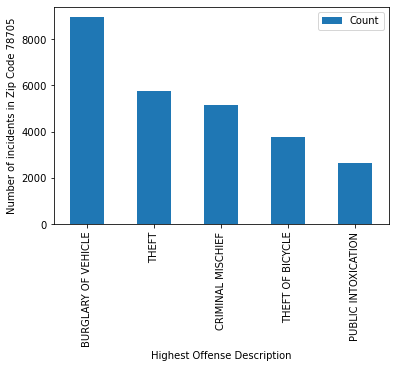

In [48]:
#Make a bar graph representing the top 5  
top5 = finaltop5.plot.bar(x='Highest Offense Description', y='Count', ylabel='Number of incidents in Zip Code 78705')

## I downloaded my data frame after I made a new dataset that contains nothing but data on the cases in my zip code where the highest offense description matches to the top 5 offenses
I posted this on my repository 

In [50]:
#this is my condensed dataframe I uploaded to the repository
finaltop5.to_csv('finaltop5_apd_data_results.csv')